<br>

## 👨‍👩‍👧‍👦 **SOCIODEMOGRAPHIC AND HEALTH RESOURCE DATA** 👨‍👩‍👧‍👦

**REGULARIZED LINEAL REGRESSION PROJECT**

## **INDEX**
- **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**
- **STEP 2: DATA EXPLORATION AND CLEANING**
- **STEP 3: UNIVARIATE VARIABLE ANALYSIS**
- **STEP 4: MULTIVARIATE VARIABLE ANALYSIS**
- **STEP 5: FEATURE ENGINEERING**
- **STEP 6: FEATURE SELECTION**
- **STEP 7: MACHINE LEARNING**
- **STEP 8: CONCLUSIONS**

<br>

### **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**

- 1.1. Problem Definition
- 1.2. Library Importing
- 1.3. Data Collection

<br>

**1.1 PROBLEM DEFINITION**

**Objective:**

To identify the relationship between sociodemographic factors and the availability of health resources at the county level in the United States.

**Research Questions:**

1. **Sociodemographic Factors and Health Resource Availability:**
* What sociodemographic factors are most strongly associated with the availability of health resources in U.S. counties?
* Do income, education, and poverty rates influence access to healthcare services?

2. **Demographic Disparities in Health Resource Distribution:**
* Are health resources distributed equitably across counties with diverse racial, ethnic, and age demographics?
* How does family structure impact the allocation of health resources?

3. **Geographic and Economic Influences on Health Resource Availability:**
* Do economic factors, such as income and unemployment rates, affect the availability of health resources in U.S. counties?
* Are rural counties less likely to have adequate health resources compared to urban areas?

4. **Predictive Modeling of Health Resource Distribution:**
* Can statistical modeling techniques, such as regularized linear regression, accurately predict the distribution of health resources across U.S. counties?
* Which sociodemographic and economic factors have the strongest predictive power in determining health resource availability?

**Data:**

The analysis will utilize county-level sociodemographic and health resource data from the United States. This data will include variables such as:

* **Sociodemographic Factors:**
   * Population demographics (age, sex, race, ethnicity)
   * Income levels
   * Education levels
   * Poverty rates
   * Family structure
* **Health Resource Availability:**
   * Number of healthcare providers
   * Hospital bed capacity
   * Access to primary care
   * Availability of specialized services

By addressing these research questions, we aim to gain a deeper understanding of the factors that influence health resource availability and identify potential disparities in access to healthcare across U.S. counties.








<br>

**1.2. LIBRARY IMPORTING**

In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import joblib
import os
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<br>

**1.3. DATA COLLECTION**

In [28]:
pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [29]:
# Export DataFrame to a local CSV file

df.to_csv("../data/raw/medical_insurance_data.csv", index=False)

<br>

## **STEP 2: DATA EXPLORATION AND CLEANING**

- 2.1. Exploration: Understanding the Features
- 2.2. Identifying null values in each feature
- 2.3. Eliminating Duplicates
- 2.4. Eliminating Irrelevant Information

<br>

**2.1. EXPLORATION: UNDERSTANDING THE FEATURES**

**1. GEOGRAPHIC IDENTIFICATION**

* `fips`: FIPS code for the county
* `STATE_FIPS`: FIPS code for the state
* `Urban_rural_code`:** Urban/rural area classification

**2. DEMOGRAPHICS AND AGE**

* `TOT_POP`: Total population
* **Age Groups:**
    * `0-9`
    * `10-19`
    * `20-29`
    * `30-39`
    * `40-49`
    * `50-59`
    * `60-69`
    * `70-79`
    * 80+
    * Percentage of the population in each age group (`0-9 y/o % of total pop`, etc.)
* **Elderly Population:**
    * `Population Aged 60+`
    * `Percent of Population Aged 60+`
* `county_pop2018_18 and older`: Population aged 18+ in 2018

**3. RACE AND ETHNICITY**

* **Population by Racial Group:**
    * `White-alone pop`
    * `Black-alone pop`
    * `Native American/American Indian-alone pop`
    * `Asian-alone pop`
    * `Hawaiian/Pacific Islander-alone pop`
    * `Two or more races pop`
* **Percentage by Racial Group:**
    * `% White-alone`
    * `% Black-alone`
    * `% NA/AI-alone`
    * `% Asian-alone`
    * `% Hawaiian/PI-alone`
    * `% Two or more races`

**4. POPULATION CHANGE AND MIGRATION**

* `N_POP_CHG_2018`: Numeric change in resident population (2017-2018)
* `GQ_ESTIMATES_2018`: Group quarters population estimate (2018)
* **Birth, Death, and Migration Rates:**
    * `R_birth_2018`
    * `R_death_2018`
    * `R_NATURAL_INC_2018`
    * `R_INTERNATIONAL_MIG_2018`
    * `R_DOMESTIC_MIG_2018`
    * `R_NET_MIG_2018`

**5. EDUCATION**

* **Education Levels:**
    * `Less than a high school diploma 2014-18`
    * `High school diploma only 2014-18`
    * `Some college or associate's degree 2014-18`
    * `Bachelor's degree or higher 2014-18`
* **Corresponding Percentages:**
    * `Percent of adults with less than a high school diploma 2014-18`
    * `Percent of adults with a high school diploma only 2014-18`

**6. POVERTY AND INCOME**

* `POVALL_2018`: Estimated number of people of all ages in poverty (2018)
* **Poverty Percentages:**
    * `PCTPOVALL_2018`: Percentage of people in poverty (2018)
    * `PCTPOV017_2018`: Percentage of people under age 17 in poverty (2018)
    * `PCTPOV517_2018`: Percentage of children aged 5-17 in poverty
* **Household Income:**
    * `MEDHHINC_2018`: Median household income estimate (2018)
    * `CI90LBINC_2018`: 90% confidence interval for median household income (lower bound)
    * `CI90UBINC_2018`: 90% confidence interval for median household income (upper bound)
    * `Med_HH_Income_Percent_of_State_Total_2018`: County median household income as a percent of state median (2018)

**7. EMPLOYMENT**

* `Civilian_labor_force_2018`: Civilian labor force annual average
* `Employed_2018`:** Number of employed individuals (annual average)
* `Unemployed_2018`:** Number of unemployed individuals (annual average)
* `Unemployment_rate_2018`: Unemployment rate

**8. HEALTH RESOURCES AND INFRAESTRUCTURE**

* **Health Professionals per 100,000 Population (2018):**
    * `Active Physicians per 100000 Population 2018 (AAMC)`: Active physicians
    * `Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)`: Active primary care physicians
    * `Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)`: Primary care patient care physicians
    * `Active General Surgeons per 100000 Population 2018 (AAMC)`: General surgeons
* **Nursing and medical assistance professionals (2019):**
    * `Total nurse practitioners (2019)`
    * `Total physician assistants (2019)`
* **Hospital infrastructure:**
    * `Total Hospitals (2019)`: Total number of hospitals
    * `ICU Beds_x`: Number of ICU beds per county

**9. HEALTH CONDITIONS PREVALENCE**

* **General health conditions:**
    * `anycondition_prevalence`
    * `anycondition_Lower 95% CI`
    * `anycondition_Upper 95% CI`
    * `anycondition_number`
* **Obesity prevalence:**
    * `Obesity_prevalence`
    * `Obesity_Lower 95% CI`
    * `Obesity_Upper 95% CI`
    * `Obesity_number`
* **Other conditions:**
    * `Heart disease_prevalence`
    * `COPD_prevalence`
    * `diabetes_prevalence`
    * `CKD_prevalence` (each with prevalence rates, confidence intervals, and population counts)

In [30]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(df.shape)

Dataset dimensions:
(3140, 108)


This DataFrame contains **3.140 ROWS** and **108 COLUMNS**

<br>

In [31]:
# Dataset informations and Data Types. 
print("Data Types")
print(df.info())

Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None


**Data Structure**
* **Type:** pandas DataFrame
* **Shape:** (3140, 108)
* **Memory Usage:** 2.6+ MB

**Column Information**
* **Total Columns:** 108
* **Data Types:**
  * `float64`: 61 columns
  * `int64`: 45 columns
  * `object`: 2 columns

**Index**
* **RangeIndex:** 0 to 3139
* This means the DataFrame contains `3140 rows`, numbered **from** `0 to 3139`. Each row represents a single data point or observation.

**Interpretation:** This data is stored in a pandas DataFrame, a popular data structure used in Python for data analysis. It contains 3140 rows (observations) and 108 columns (features). The data types of the columns vary, with most being numerical (float64 or int64) and a few being categorical or text-based (object). 

In [32]:
# Obtaining the description of the dataset's statistics:
df.describe(include='all')

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140,3140,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [33]:
# Analyze data types
print("TYPES OF DATA IN THE DATASET:", df.dtypes.unique())

# Identify variable types
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
categorical_vars = df.select_dtypes(include=['O']).columns

# Count and print variable counts
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)
print('\n')
print(f"Number of CATEGORICAL variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of NUMERICAL variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

TYPES OF DATA IN THE DATASET: [dtype('int64') dtype('float64') dtype('O')]


Number of CATEGORICAL variables: 2
Categorical variables: ['COUNTY_NAME', 'STATE_NAME']


Number of NUMERICAL variables: 106
Numerical variables: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMEST

**DATA TYPES**
- Number of **CATEGORICAL VARIABLES**: **`2`** 
- Number of **NUMERICAL VARIABLES**: **`106`** 

Eliminating duplicates is a crucial step to ensure data quality and accuracy. Duplicates can skew statistical analyses and lead to incorrect conclusions. By removing duplicate rows or observations, we guarantee that each data point is counted only once, preventing overrepresentation of certain information and providing a more reliable foundation for further analysis.

<br>

**2.2. IDENTIFYING NULL VALUES IN EACH FEATURE**

In [34]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

<br>

**2.3. ELIMINATING DUPLICATES**

In [35]:
# Display initial row count
initial_row_count = df.shape[0]

# Check and remove duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {df.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


<br>

**2.4. ELIMINATING IRRELEVANT INFORMATION**

To streamline our analysis and focus on the core relationship between sociodemographic factors and healthcare resources, we've identified and excluded several variables that were deemed irrelevant.

**Variables Removed:**

* **Geographic Identifiers:** `flips`, `STATE_FIPS`
* **Population Change and Migration:** `R_INTERNATIONAL_MIG_2018`, `R_DOMESTIC_MIG_2018`, `R_NET_MIG_2018`, `N_POP_CHG_2018`
* **Income Confidence Intervals:** `CI90LBINC_2018`, `CI90UBINC_2018`
* **Granular Demographic Details:** Overly detailed racial and age distribution data
* **Redundant Information:** Other variables that did not directly contribute to our analytical objectives

**Benefits of Variable Reduction:**

* **Focused Analysis:** A more concise dataset centered on key variables.
* **Reduced Noise:** Elimination of unnecessary information.
* **Improved Efficiency:** Faster processing and modeling.

In [36]:
irrelevant_variables = ['80+ y/o % of total pop',
 'Med_HH_Income_Percent_of_State_Total_2018',
 'CKD_Lower 95% CI',
 'Unemployment_rate_2018',
 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
 'CKD_Upper 95% CI',
 'Obesity_Upper 95% CI',
 'ICU Beds_x',
 'Civilian_labor_force_2018',
 '0-9 y/o % of total pop',
 'diabetes_number',
 '20-29',
 'POVALL_2018',
 'CI90UBINC_2018',
 'COPD_Lower 95% CI',
 '40-49 y/o % of total pop',
 '70-79 y/o % of total pop',
 'Heart disease_Upper 95% CI',
 '19-Oct',
 'anycondition_Lower 95% CI',
 '30-39',
 'Heart disease_number',
 'Obesity_Lower 95% CI',
 'anycondition_number',
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'R_DOMESTIC_MIG_2018',
 'CNTY_FIPS',
 'CKD_number',
 'Active General Surgeons per 100000 Population 2018 (AAMC)',
 'PCTPOVALL_2018',
 'COPD_Upper 95% CI',
 'diabetes_Lower 95% CI',
 'Family Medicine/General Practice Primary Care (2019)',
 'Total nurse practitioners (2019)',
 'COPD_prevalence',
 '50-59 y/o % of total pop',
 'anycondition_Upper 95% CI',
 "Percent of adults with a bachelor's degree or higher 2014-18",
 'Less than a high school diploma 2014-18',
 '50-59',
 'R_INTERNATIONAL_MIG_2018',
 '30-39 y/o % of total pop',
 'R_NET_MIG_2018',
 'diabetes_Upper 95% CI',
 'High school diploma only 2014-18',
 'Percent of adults with a high school diploma only 2014-18',
 'GQ_ESTIMATES_2018',
 '10-19 y/o % of total pop',
 'Total physician assistants (2019)',
 'Employed_2018',
 'R_NATURAL_INC_2018',
 '40-49',
 'CI90LBINC_2018',
 '60-69 y/o % of total pop',
 'Total Population',
 'R_birth_2018',
 'COPD_number',
 'Internal Medicine Primary Care (2019)',
 'POP_ESTIMATE_2018',
 'Percent of Population Aged 60+',
 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'anycondition_prevalence',
 'county_pop2018_18 and older',
 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
 'N_POP_CHG_2018',
 '0-9',
 'Heart disease_Lower 95% CI',
 'Obesity_number',
 'Median_Household_Income_2018',
 'CKD_prevalence',
 "Percent of adults completing some college or associate's degree 2014-18",
 'fips',
 'STATE_FIPS',
 '20-29 y/o % of total pop',
 'Unemployed_2018',
 'Urban_rural_code',
 'Total Specialist Physicians (2019)',
 'R_death_2018',
 'Percent of adults with less than a high school diploma 2014-18']

In [37]:
df = df.drop(columns=[col for col in irrelevant_variables if col in df.columns])

print("Remaining columns in the dataset:")
print(df.columns)

Remaining columns in the dataset:
Index(['TOT_POP', '60-69', '70-79', '80+', 'White-alone pop', '% White-alone',
       'Black-alone pop', '% Black-alone',
       'Native American/American Indian-alone pop', '% NA/AI-alone',
       'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       'Two or more races pop', '% Two or more races',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18', 'PCTPOV017_2018',
       'PCTPOV517_2018', 'MEDHHINC_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Hospitals (2019)', 'Population Aged 60+', 'COUNTY_NAME',
       'STATE_NAME', 'Obesity_prevalence', 'Heart disease_prevalence',
       'diabetes_prevalence'],
      dtype='object')


In [38]:
df.head()

,TOT_POP,60-69,70-79,80+,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Hospitals (2019),Population Aged 60+,COUNTY_NAME,STATE_NAME,Obesity_prevalence,Heart disease_prevalence,diabetes_prevalence
0,55601,5826,4050,2014,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,10552,10291,19.3,19.5,59338,217.1,1.148905,10523,Autauga,Alabama,35.8,7.9,12.9
1,218022,29932,20936,9368,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,46025,46075,13.9,13.1,57588,217.1,4.505074,53519,Baldwin,Alabama,29.7,7.8,12.0
2,24881,3076,2244,1048,12209,49.069571,12042,48.398376,164,0.659137,113,0.454162,46,0.184880,307,1.233873,4566,2220,43.9,36.7,34382,217.1,0.514126,6150,Barbour,Alabama,40.7,11.0,19.7
3,22400,2545,1723,785,17211,76.834821,4770,21.294643,98,0.437500,53,0.236607,26,0.116071,242,1.080357,3846,1813,27.8,26.3,46064,217.1,0.462860,4773,Bibb,Alabama,38.7,8.6,14.1
4,57840,6965,4931,2335,55456,95.878285,950,1.642462,378,0.653527,185,0.319848,70,0.121024,801,1.384855,13267,5010,18.0,15.5,50412,217.1,1.195171,13600,Blount,Alabama,34.0,9.2,13.5


In [39]:
print("Columns in the dataset:")
print(list(df.columns))

Columns in the dataset:
['TOT_POP', '60-69', '70-79', '80+', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Hospitals (2019)', 'Population Aged 60+', 'COUNTY_NAME', 'STATE_NAME', 'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence']


<br>

## **STEP 3: ANALYSIS OF UNIVARIATE VARIABLES**

- 3.1. Analysis of categorical variables
- 3.2. Analysis of numerical variables

In [40]:
num = ['int64', 'float64']
cat = ['O']

df_numerical = df.select_dtypes(num)
df_categorical = df.select_dtypes(cat)

**3.1. ANALYSIS OF CATEGORICAL VARIABLES**

In [41]:
df_categorical.head(3)

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama


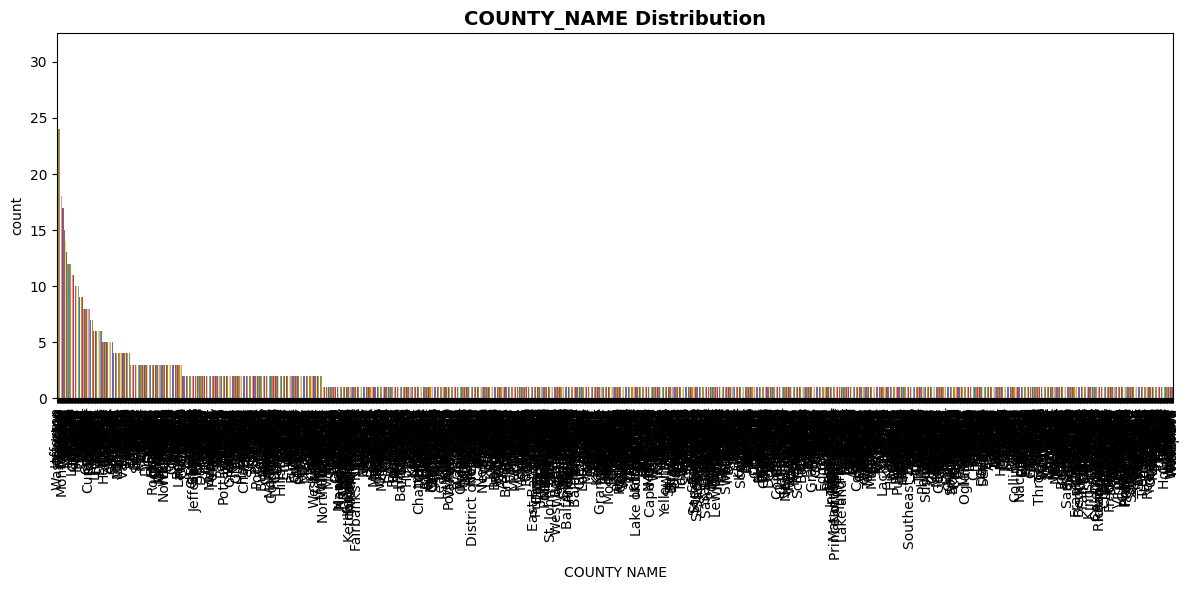

In [42]:
# Create a figure with increased width for better spacing
plt.figure(figsize=(12, 6))

# Plot for 'COUNTY_NAME' with a color palette and rotation for long labels
sns.countplot(x='COUNTY_NAME', data=df_categorical, order=df_categorical['COUNTY_NAME'].value_counts().index,
             palette="Set1")  # Use a color palette with good contrast
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("COUNTY_NAME Distribution", fontsize=14, fontweight='bold')
plt.xlabel("COUNTY NAME")  # Add x-axis label

plt.tight_layout()
plt.show()

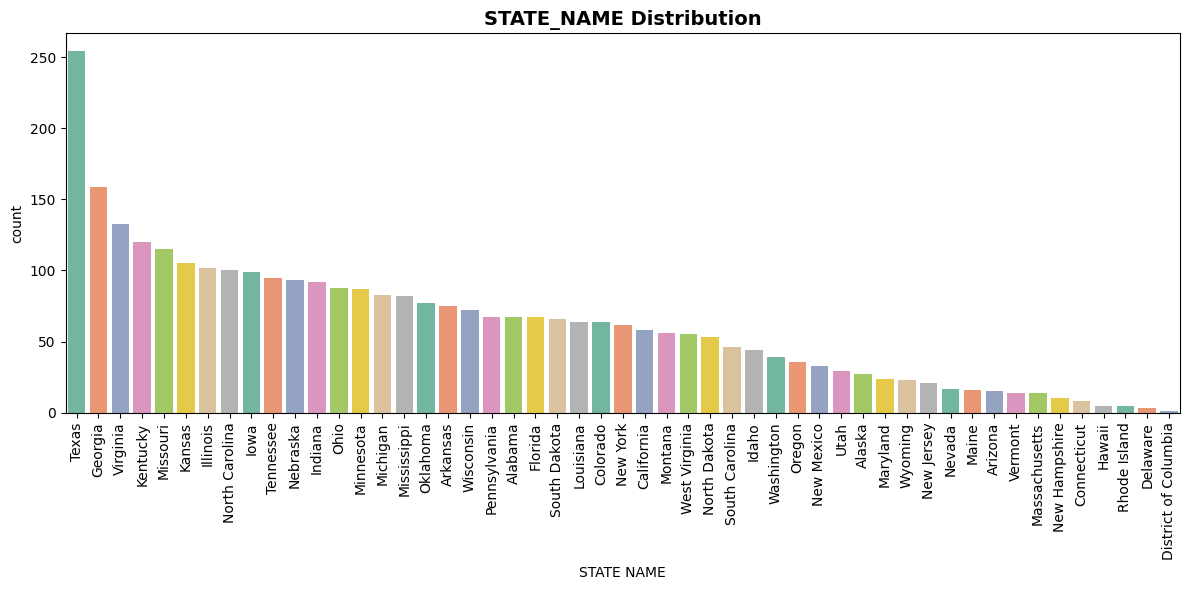

In [43]:
# Create a separate figure for STATE_NAME with increased width
plt.figure(figsize=(12, 6))

# Plot for 'STATE_NAME' with a color palette
sns.countplot(x='STATE_NAME', data=df_categorical, order=df_categorical['STATE_NAME'].value_counts().index,
             palette="Set2")  # Use the same color palette for consistency
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("STATE_NAME Distribution", fontsize=14, fontweight='bold')
plt.xlabel("STATE NAME")  # Add x-axis label

plt.tight_layout()
plt.show()

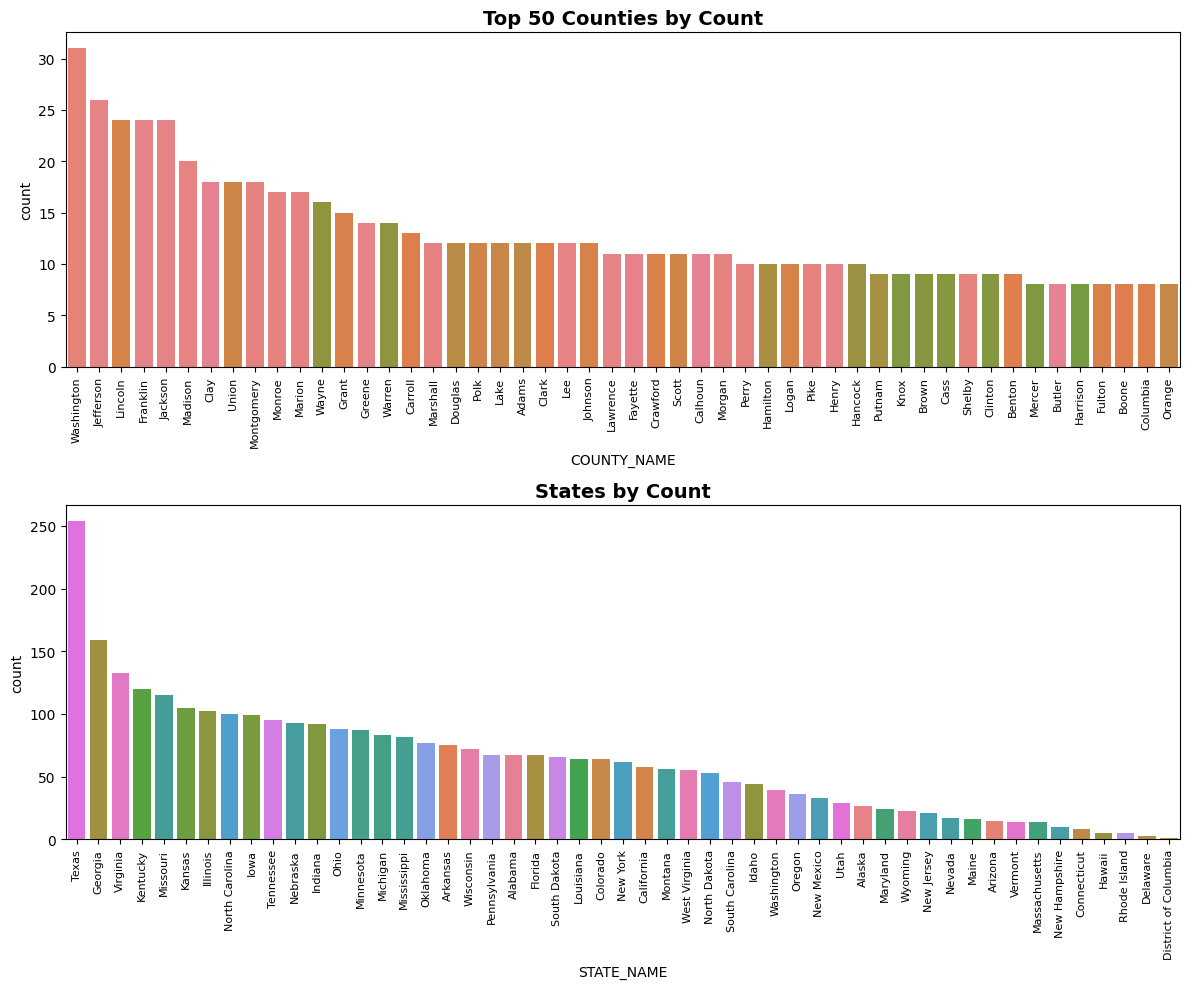

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot for 'COUNTY_NAME' - Top 50
sns.countplot(ax=ax[0], data=df_categorical, x='COUNTY_NAME', order=df_categorical['COUNTY_NAME'].value_counts().index[:50], hue='COUNTY_NAME')
ax[0].set_title("Top 50 Counties by Count", fontsize=14, fontweight='bold')

# Plot for 'STATE_NAME'
sns.countplot(ax=ax[1], data=df_categorical, x='STATE_NAME', order=df_categorical['STATE_NAME'].value_counts().index, hue='STATE_NAME')
ax[1].set_title("States by Count", fontsize=14, fontweight='bold')


for a in ax:
    a.tick_params(axis='x', labelrotation=90, labelsize=8)

plt.tight_layout()
plt.show()


**County distribution and its impact on Health Care Resources in the U.S.**

**Texas** stands out for having a much larger number of counties compared to other states, highlighting a distinctive administrative framework with more subdivisions. This suggests that Texas may have specific local governance needs that could influence how healthcare resources and services are distributed.

**Other Southern and Midwestern states,** like Georgia and Kentucky, also feature a high number of counties. This trend implies that these regions may favor a larger number of subdivisions, potentially to manage vast areas with spread-out populations. It could point to a preference for more decentralized governance in these states.

**In contrast, smaller or more densely populated states,** particularly in the Northeast and West (for example, Delaware and the District of Columbia), have fewer counties. This likely reflects a tendency towards centralized governance, as higher population density allows for more efficient administration with fewer subdivisions.

**The county chart reveals** that names like Washington, Jefferson, and Franklin appear frequently across the U.S., with multiple counties sharing the same name in various states.

**3.2. ANALYSIS OF NUMERICAL VARIABLES**

In [45]:
list(df_numerical.head(3))

['TOT_POP',
 '60-69',
 '70-79',
 '80+',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 2014-18",
 'PCTPOV017_2018',
 'PCTPOV517_2018',
 'MEDHHINC_2018',
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Total Hospitals (2019)',
 'Population Aged 60+',
 'Obesity_prevalence',
 'Heart disease_prevalence',
 'diabetes_prevalence']

To normalize for population size and enable fair comparisons across counties of varying sizes, we opted to use prevalence percentages (e.g., `Obesity_prevalence`, `diabetes_prevalence`, and `Heart disease_prevalence`) instead of raw case numbers. This approach allows for a more precise identification of health disparities.

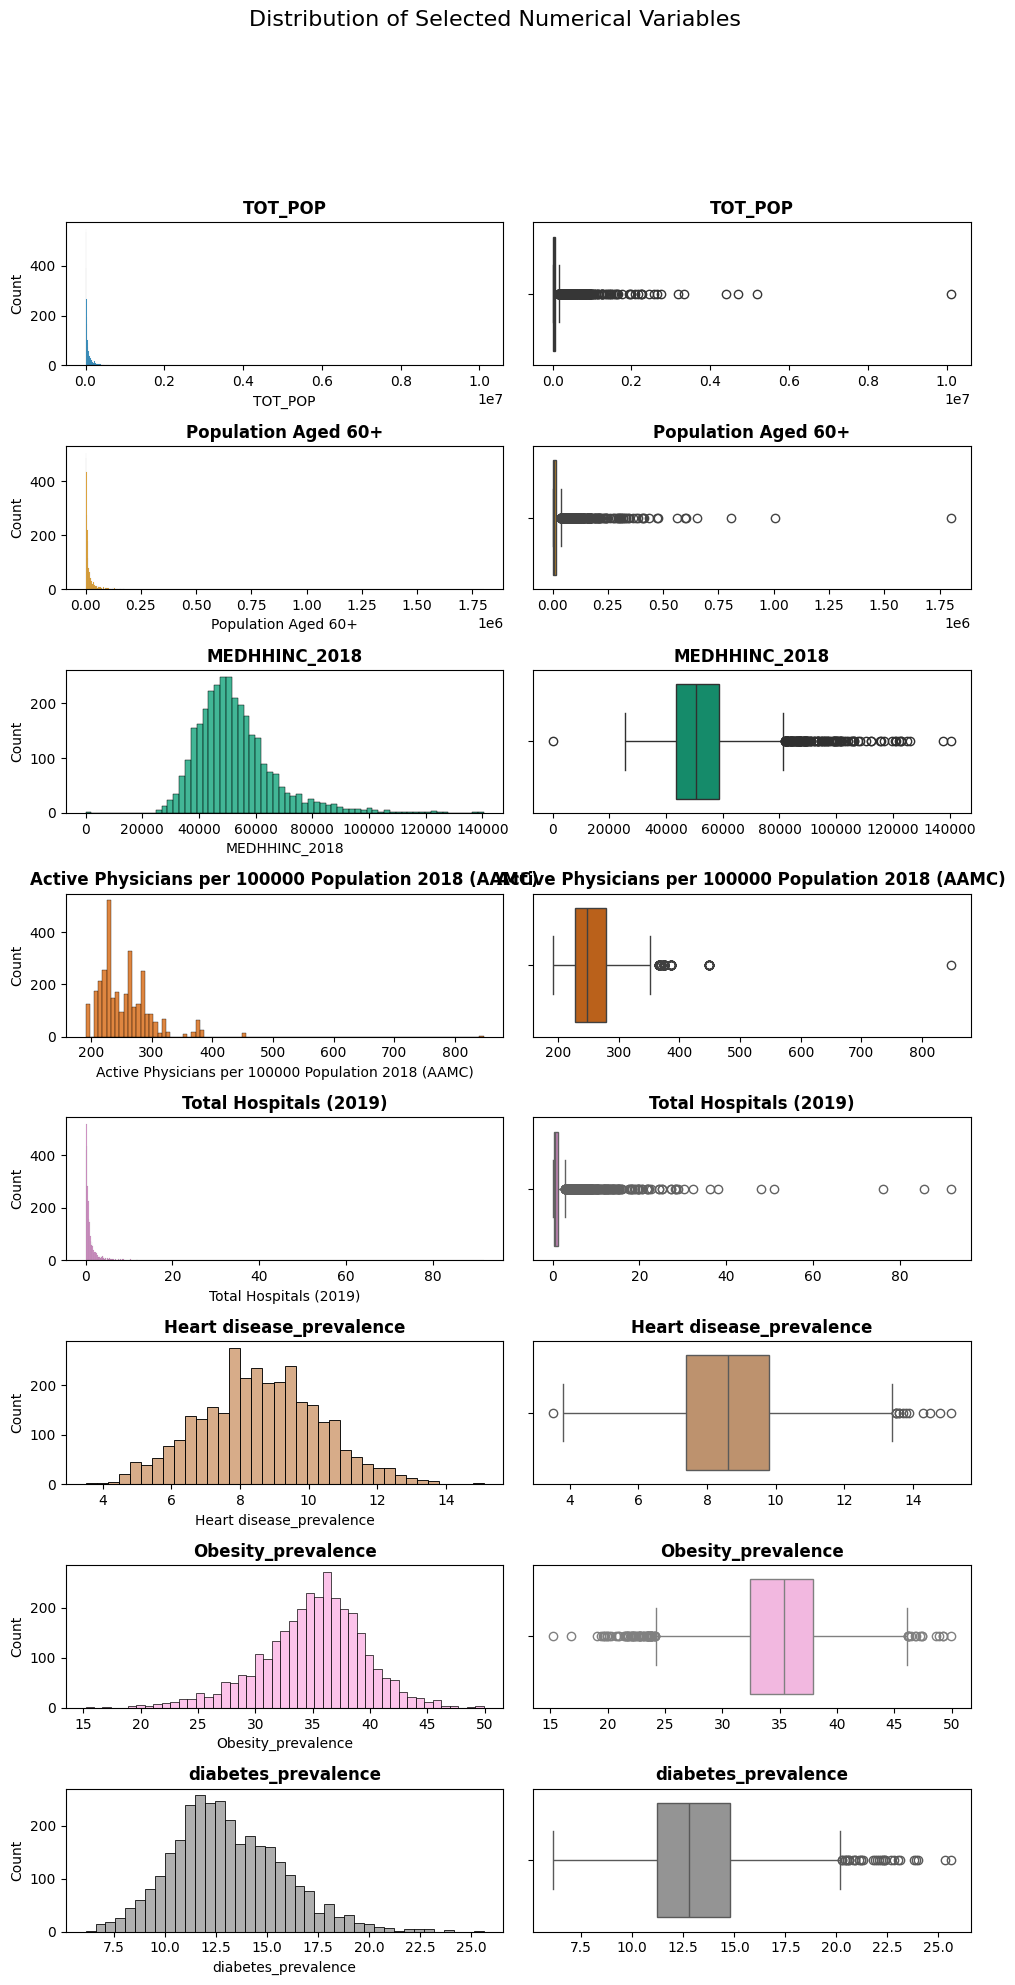

In [47]:
# List of variables chosen for analysis
selected_variables = [
    'TOT_POP',
    'Population Aged 60+',
    'MEDHHINC_2018',
    'Active Physicians per 100000 Population 2018 (AAMC)',
    'Total Hospitals (2019)',
    'Heart disease_prevalence',
    'Obesity_prevalence',
    'diabetes_prevalence'
    
]

df_numerical = df[selected_variables]

def plot_numerical_variables(df_numerical, hue=None): 
    """
    Plots histograms and boxplots for all numeric variables in `df_numerical`
    using a 2-column layout with a fixed color palette for visual consistency.

    Parameters:
    - df_numerical: DataFrame containing only the numerical columns to analyze.
    - hue: Column name for hue (optional). If provided, it must exist in `df_numerical`.
    """
  
    numerical_columns = df_numerical.columns.tolist()

  
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  

   
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 5))
    plt.suptitle('Distribution of Selected Numerical Variables', fontsize=16, y=1.02)

   
    axes = axes.flatten()

   
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=df_numerical, x=col, hue=hue if hue in df_numerical.columns else None, color=color)
        axes[i * 2].set_title(col, fontweight='bold')  
        
        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=df_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col, fontweight='bold')  
        axes[i * 2 + 1].set(xlabel=None)  


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_numerical_variables(df_numerical)

To better visualize data distribution, a new graph was created with a shorter limit on the x-axis for some features.

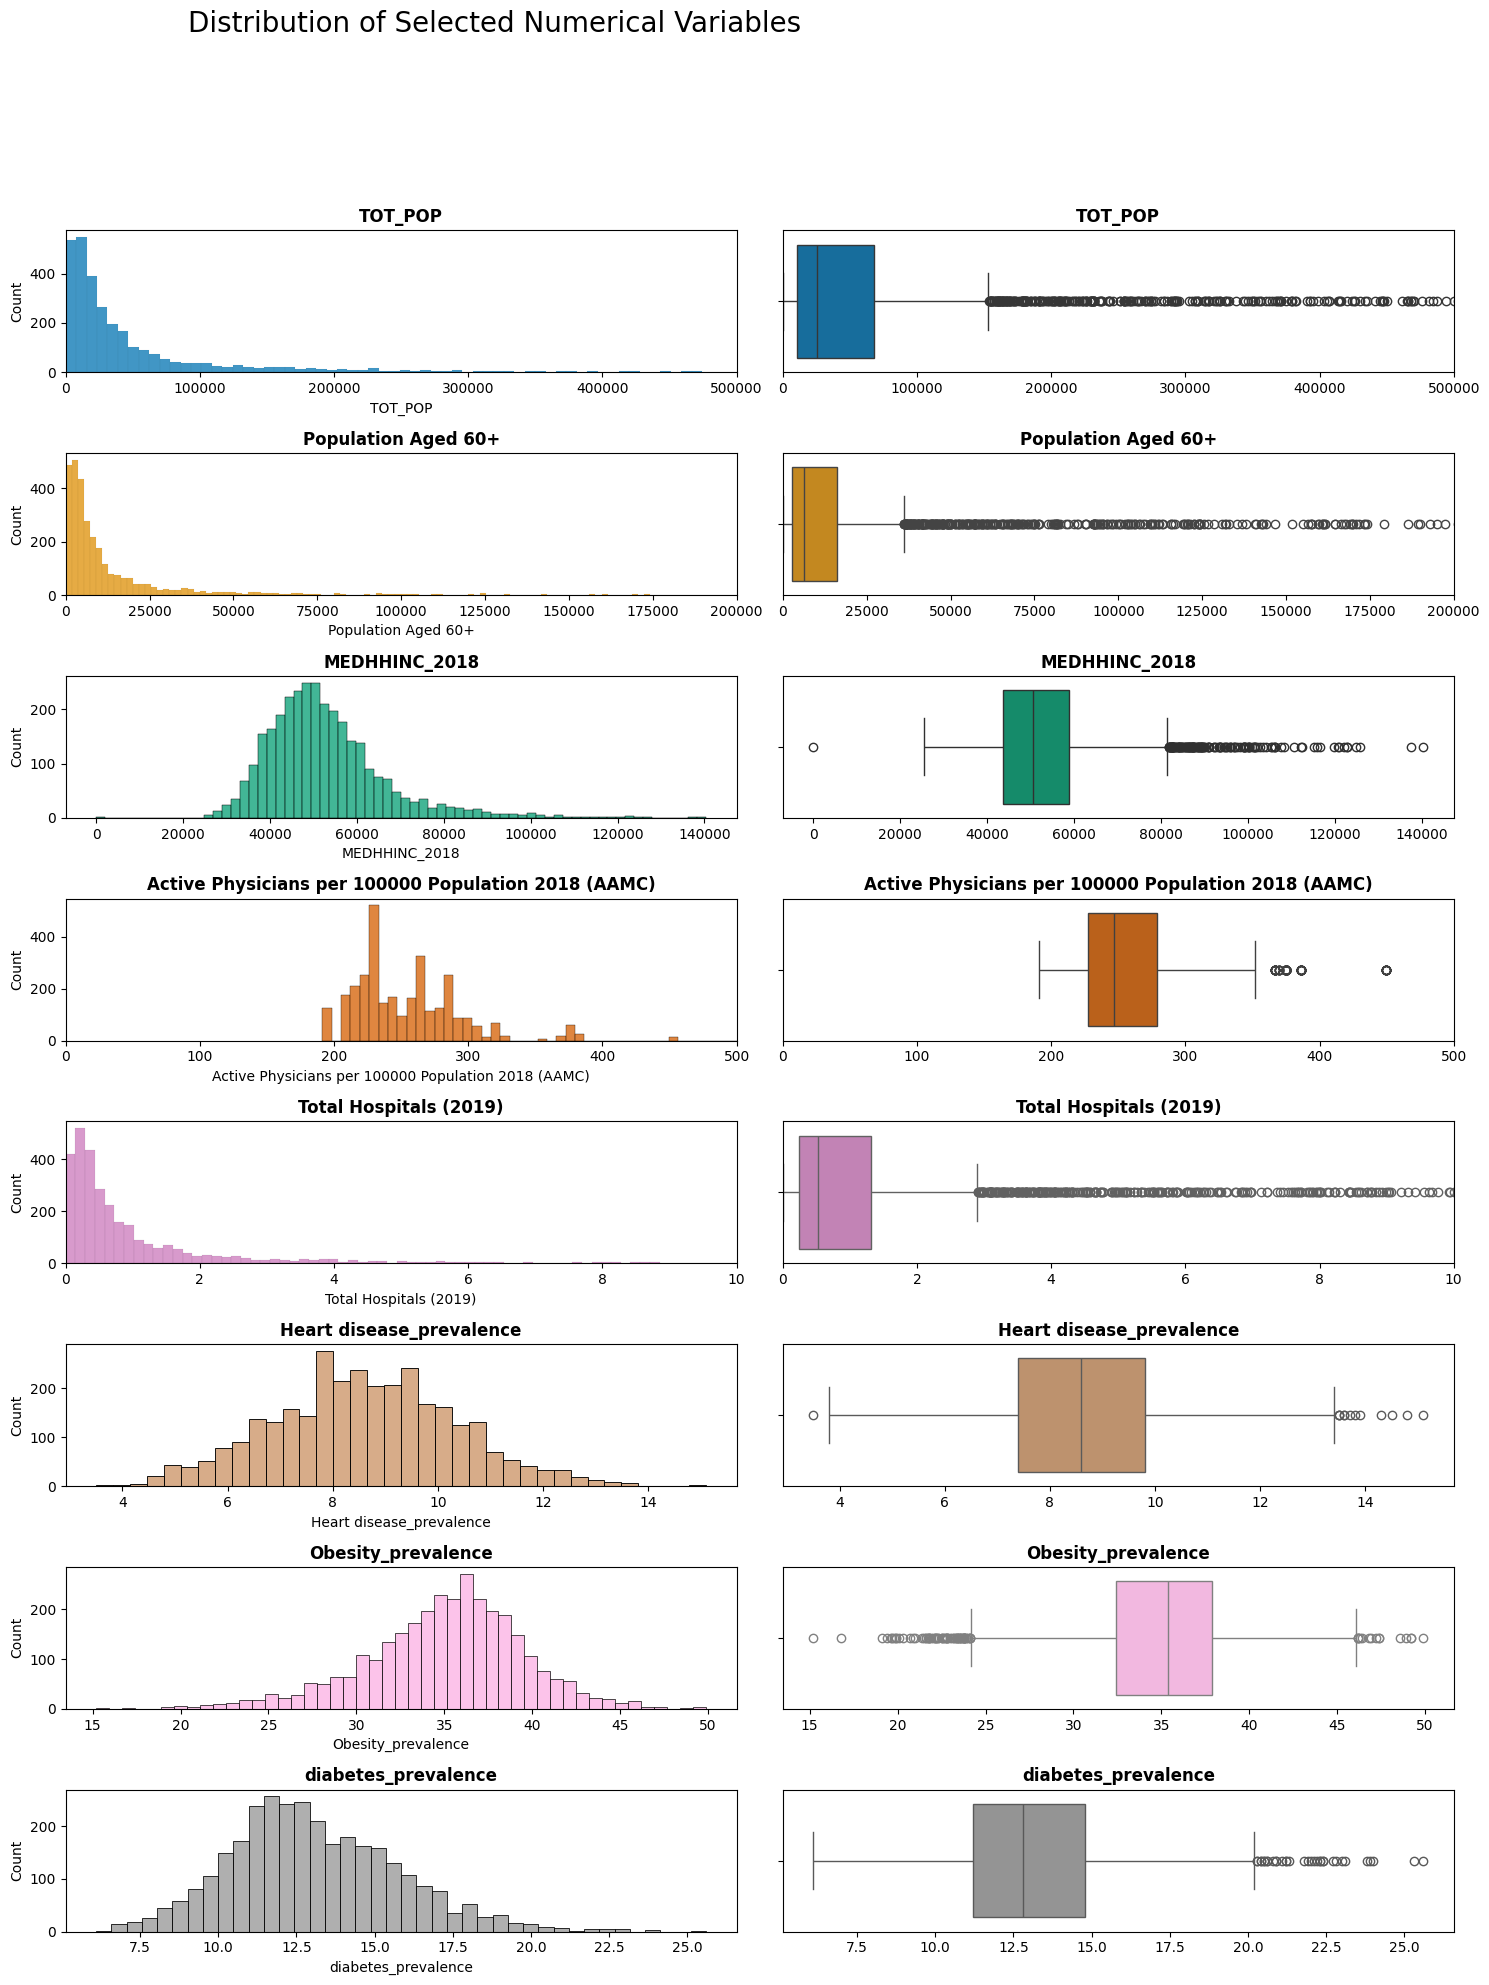

In [48]:
def plot_numerical_variables(df_numerical, hue=None): 
    
    # Set x-axis limits for specific variables
    x_limits = {
        'TOT_POP': (0, 500000),  
        'Population Aged 60+': (0, 200000),  
        'Active Physicians per 100000 Population 2018 (AAMC)': (0, 500),  
        'Total Hospitals (2019)': (0, 10)  
    }

   
    numerical_columns = df_numerical.columns.tolist()
    
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  


    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 5))
    plt.suptitle('Distribution of Selected Numerical Variables', fontsize=20, y=1.02)

    axes = axes.flatten()

   
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=df_numerical, x=col, hue=hue if hue in df_numerical.columns else None, color=color)
        axes[i * 2].set_title(col, fontweight='bold')  
        
        if col in x_limits:
            axes[i * 2].set_xlim(x_limits[col])

        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=df_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col, fontweight='bold')  
        axes[i * 2 + 1].set(xlabel=None)  

        if col in x_limits:
            axes[i * 2 + 1].set_xlim(x_limits[col])

    plt.tight_layout(rect=[0, 0.03, 1.5, 0.95])
    plt.show()

plot_numerical_variables(df_numerical)

**Statements**

* **Population Demographics:**
    * Total Population and Population Aged 60+: Right-skewed distributions suggest most counties have smaller populations, especially among the elderly. Older populations may be at higher risk for heart disease.
    * Median Household Income (MEDHHINC_2018): A symmetric distribution indicates a range of economic conditions. Lower-income counties may face disparities in healthcare access and heart disease prevalence.
* **Healthcare Infrastructure:**
    * Active Physicians per 100,000 Population and Total Hospitals: Skewed distributions suggest variations in healthcare availability. Fewer physicians and hospitals may hinder the management of chronic diseases.
* **Health Conditions:**
    * Obesity and Diabetes Prevalence: Both show significant prevalence across most counties, highlighting their roles as major risk factors for heart disease.
* **Target Variable: Heart Disease Prevalence**
    * A symmetric distribution with a concentration between 6% and 12% indicates variability across counties.
    * **Rationale for Choice:** Heart disease is a complex condition influenced by sociodemographic factors, healthcare infrastructure, and other chronic conditions. By examining these factors, we can gain insights into potential interventions and policies to address heart disease and its underlying causes.

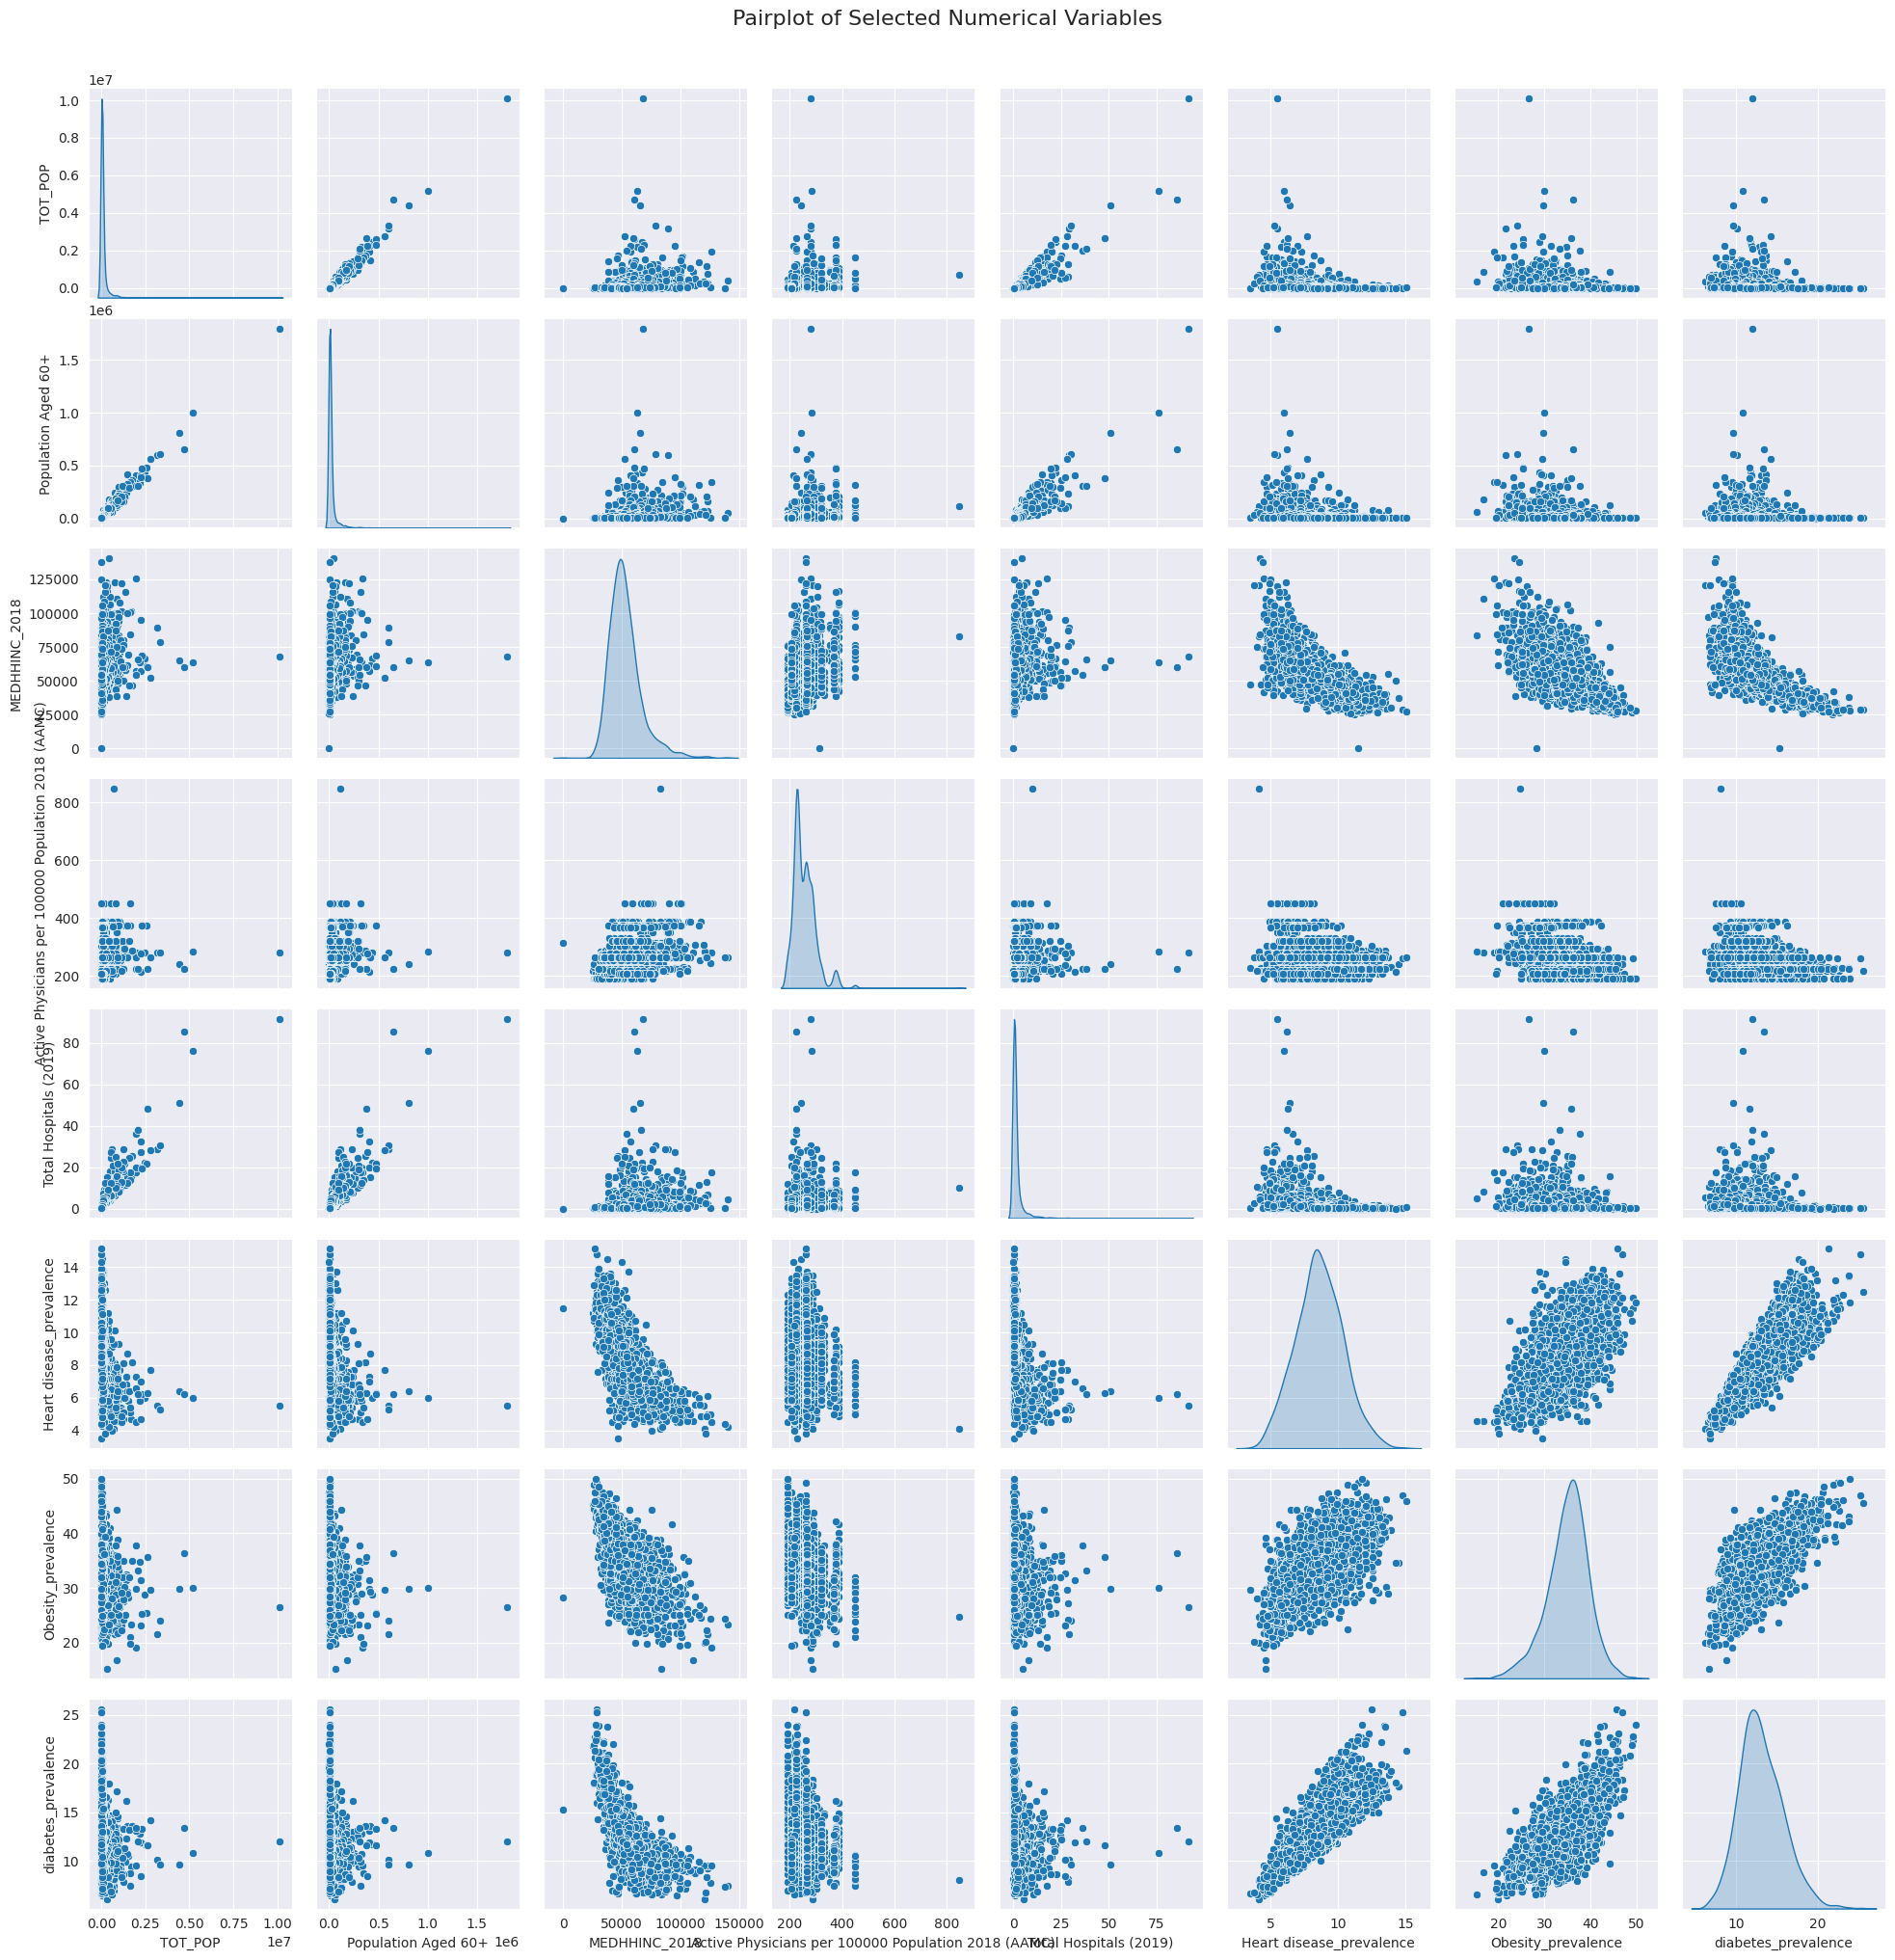

In [ ]:
def plot_numerical_variables_v2(df_numerical, hue=None):
   
    sns.set_style("darkgrid")  # Set a red-based style (adjust as needed)
    if hue is None:
        # No hue variable provided, remove palette argument
        sns.pairplot(df_numerical, diag_kind="kde")
    else:
        # Use the provided hue variable and palette (if desired)
        sns.pairplot(df_numerical, hue=hue, diag_kind="kde", palette="viridis")

    plt.suptitle('Pairplot of Selected Numerical Variables', fontsize=16, y=1.02)
    plt.show()

plot_numerical_variables_v2(df_numerical)

**Pairplot Analysis: Initial Observations**

**Understanding the Pairplot:** A pairplot is a powerful visualization tool that provides a comprehensive overview of the relationships between pairs of variables in a dataset. In this specific pairplot, each subplot represents the relationship between two numerical variables. The diagonal plots display the distribution of individual variables, while the off-diagonal plots show scatterplots that visualize the pairwise relationships.

- **Key Observations:**
1. **Correlations:**
   * **Positive Correlations:** There appears to be a positive correlation between:
     - `Obesity_prevalence` and `diabetes_prevalence`: This suggests that counties with higher obesity rates also tend to have higher rates of diabetes, which aligns with established medical knowledge.
     - `Population Aged 60+` and `Heart disease_prevalence`: This indicates that counties with a larger elderly population may have a higher prevalence of heart disease, potentially due to age-related health risks.
   * **Negative Correlations:** While less pronounced, there might be a slight negative correlation between:
     - `MEDHHINC_2018` and some health-related variables: This could suggest that counties with lower median incomes might have higher rates of certain health conditions. However, further analysis is needed to confirm this.

2. **Distributions:**
   * **Skewness:** Many variables, particularly those related to population and health outcomes, exhibit right-skewed distributions. This indicates that there are a few counties with significantly higher values for these variables, while most counties have relatively lower values.
   * **Outliers:** Some plots suggest the presence of outliers, especially in variables like `Total_POP` and `Population Aged 60+`. These outliers could represent large metropolitan areas or rural counties with unique demographic characteristics.

3. **Clustering:**
   * **Clusters:** Visual inspection reveals potential clusters in the data, particularly in the scatterplots between `Heart disease_prevalence`, `Obesity_prevalence`, and `diabetes_prevalence`. These clusters might indicate subgroups of counties with similar health profiles.

